# Keras CNN

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.activations import relu, softmax

import numpy as np

### 提取数据

In [3]:
f = np.load('mnist.npz')
train_images = f['x_train']
train_labels = f['y_train']
test_images = f['x_test']
test_labels = f['y_test']

### 改变形状，缩放值

In [3]:
train_images: np.ndarray = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images: np.ndarray = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

### 标签分类编码

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 网络架构

In [5]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation=relu, input_shape=(28, 28, 1)))
model.add(Conv2D(64, (5, 5), activation=relu))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(10, activation=softmax))

### 模型结构

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### 编译步骤

损失函数、优化器、监控指标

In [7]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

### 模型拟合

In [8]:
epochs = 8

log = model.fit(train_images, train_labels,
                batch_size=100,
                epochs=8,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 32s 525us/step - loss: 0.2215 - acc: 0.9319 - val_loss: 0.0530 - val_acc: 0.9839
Epoch 2/8
60000/60000 [==============================] - 28s 471us/step - loss: 0.0823 - acc: 0.9762 - val_loss: 0.0354 - val_acc: 0.9880
Epoch 3/8
60000/60000 [==============================] - 28s 472us/step - loss: 0.0643 - acc: 0.9806 - val_loss: 0.0266 - val_acc: 0.9904
Epoch 4/8
60000/60000 [==============================] - 28s 472us/step - loss: 0.0528 - acc: 0.9848 - val_loss: 0.0269 - val_acc: 0.9906
Epoch 5/8
60000/60000 [==============================] - 28s 472us/step - loss: 0.0472 - acc: 0.9862 - val_loss: 0.0248 - val_acc: 0.9919
Epoch 6/8
60000/60000 [==============================] - 28s 472us/step - loss: 0.0424 - acc: 0.9879 - val_loss: 0.0249 - val_acc: 0.9919
Epoch 7/8
60000/60000 [==============================] - 28s 471us/step - loss: 0.0416 - acc: 0.9875 - val_loss: 0.0221 - 

### 绘制 loss 与 accuracy

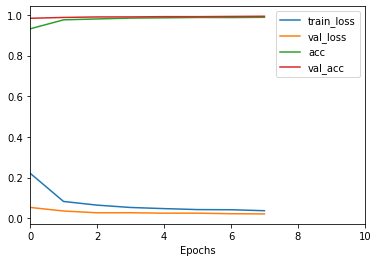

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.plot(log.history['loss'], label='train_loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.plot(log.history['acc'], label='acc')
plt.plot(log.history['val_acc'], label='val_acc')
plt.xlabel('Epochs')
plt.xlim((0, epochs + 2))
plt.legend(loc='upper right')
plt.show()